In [1]:
from header import  *

In [ ]:
df = pd.read_excel('../exams/Midterm scores.xlsx')
df = df.iloc[:,:5]
df.columns = ['id','name','session','version','num']
df['num'] = df['num'].mask(df['version']=='Absent', np.nan)

In [ ]:
df['score'] = df['num'] / 28 * 100

In [ ]:
N = df[df['version']!='Absent'].shape[0]
mean = df.num.mean()
mean_score = df.score.mean()
q1, q2, q3 = df.num.quantile([0.25, 0.5, 0.75])
std = df.num.std()
std_score = df.score.std()
x0 = mean - 2* std
x1 = mean - std 
x2 = mean + std 
x3 = mean + 2 * std

In [ ]:
df.groupby(['session'])['score'].mean()

session
L4    64.663866
L5    67.983193
L6    60.252101
L7    63.307823
Name: score, dtype: object

In [ ]:
df[df['version']!='Absent'].groupby(['version'])['score'].mean()

version
A    63.966837
B     63.17952
C    65.006266
Name: score, dtype: object

In [ ]:
data1 = df.groupby(['session'])['score'].mean().map(lambda x: f'{x:.2f}').to_numpy().reshape(4,1)
data2 = df[df['version']!='Absent'].groupby(['version'])['score'].mean().map(lambda x: f'{x:.2f}').to_numpy().reshape(3,1)

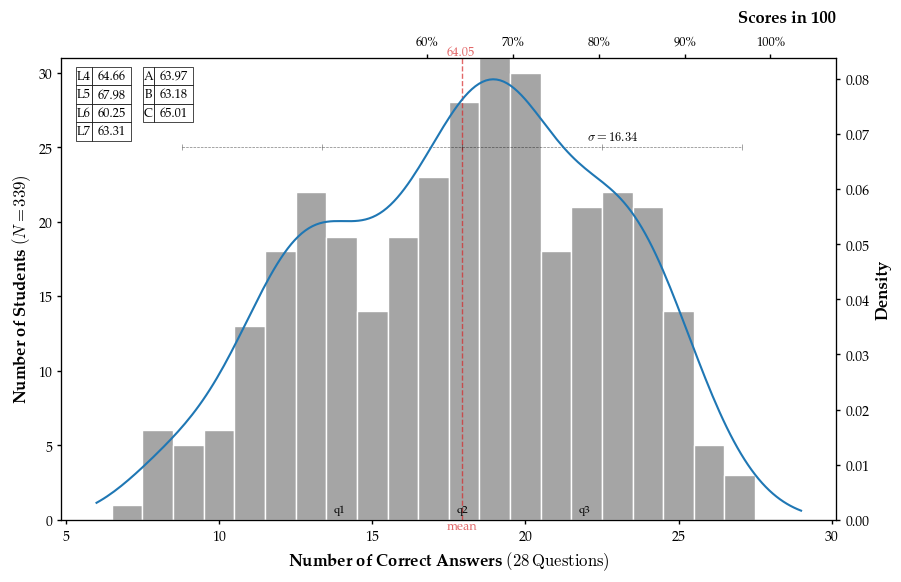

In [ ]:
anchor = 25
f, ax = plt.subplots(figsize = (10, 6))
sns.histplot(df['num'], color=tab20(14), alpha=0.7, kde=False, ec='white', discrete=True, ax=ax)
ax2 = ax.twinx()
sns.kdeplot(data=df, x='num', color=tab20(0), ax=ax2, clip=(6,29))


ax1 = ax.twiny()
ax1.set_xlim(ax.get_xlim())
ax.set_ylim(0,31)
ax1.set_xticks([i*28 for i in [0.6, 0.7, 0.8, 0.9, 1]])
ax1.set_xticklabels(['60%', '70%', '80%', '90%', '100%' ], fontsize=9)

ax.vlines(mean, 0, 31, linestyle='--', linewidth=1, color=tab20(6),  alpha=0.7)
ax.annotate('mean', xy=(mean,0), xytext=(mean-0.5, -0.6), color=tab20(6),  alpha=0.7, fontsize=9)
ax.annotate(f'{mean_score:.2f}', xy=(mean,0), xytext=(mean-0.5, 31.2), color=tab20(6),  alpha=0.7, fontsize=9)

ax.annotate('q1', xy=(q1,0), xytext=(q1-0.25, 0.5), color='black', fontsize=8)
ax.annotate('q2', xy=(q2,0), xytext=(q2-0.25, 0.5), color='black', fontsize=8)
ax.annotate('q3', xy=(q3,0), xytext=(q3-0.25, 0.5), color='black', fontsize=8)

ax.hlines(anchor, x0, x1, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
ax.hlines(anchor, x1, mean, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
ax.hlines(anchor, mean, x2, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
ax.hlines(anchor, x2, x3, linestyle='--', linewidth=0.5, color='black', alpha=0.5)

ax.vlines(x0, anchor - 0.2, anchor + 0.2, linestyles='solid', linewidth=0.5, color='black', alpha=0.5)
ax.vlines(x1, anchor - 0.2, anchor + 0.2, linestyles='solid', linewidth=0.5, color='black', alpha=0.5)
ax.vlines(mean, anchor - 0.2, anchor + 0.2, linestyles='solid', linewidth=0.5, color='black', alpha=0.5)
ax.vlines(x2, anchor - 0.2, anchor + 0.2, linestyles='solid', linewidth=0.5, color='black', alpha=0.5)
ax.vlines(x3, anchor - 0.2, anchor + 0.2, linestyles='solid', linewidth=0.5, color='black', alpha=0.5)
ax.annotate(rf'$\sigma={std_score:.2f}$', xy=(x2, anchor), xytext=(x2-0.5, anchor + 0.5), color='black', fontsize=9)

table1 = ax.table(data1, cellLoc='center', rowLabels=['L4','L5','L6','L7'], bbox=[0.04, 0.82, 0.05, 0.16])
table1.auto_set_font_size(False)  # Disable automatic font size
table1.set_fontsize(9)            # Set font size
for key, cell in table1.get_celld().items():
    cell.set_edgecolor('black')    # Set border color
    cell.set_linewidth(0.5)  
    cell.set_text_props(ha='center', va='center')
    
table2 = ax.table(data2, cellLoc='center', rowLabels=['A','B','C'], bbox=[0.12, 0.86, 0.05, 0.12])

table2.auto_set_font_size(False)  # Disable automatic font size
table2.set_fontsize(9)            # Set font size
for key, cell in table2.get_celld().items():
    cell.set_edgecolor('black')    # Set border color
    cell.set_linewidth(0.5)  
    cell.set_text_props(ha='center', va='center')
    
ax.set_xlabel(r'Number of Correct Answers $(28\, \text{Questions})$', fontsize=12, fontweight='bold')
ax.set_ylabel(rf'Number of Students $(N={N})$', fontsize=12, fontweight='bold')
ax1.xaxis.labelpad = 10
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.set_xlabel('Scores in 100', loc='right', fontsize=12, fontweight='bold')
plt.show()   
f.savefig('figures/midterm_score_dist.png', format='png', dpi=1000, bbox_inches='tight')